#  Logistic Regression (Multiclass Classification)



In [4]:
'''The load_digits function from sklearn.datasets is a convenient way to load the "Digits" dataset, 
which is a collection of images of handwritten digits (0 through 9) commonly used for classification and machine learning tasks. 
Here's an example of how to load and explore the dataset:'''
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

Data shape: (1797, 64)
Target shape: (1797,)


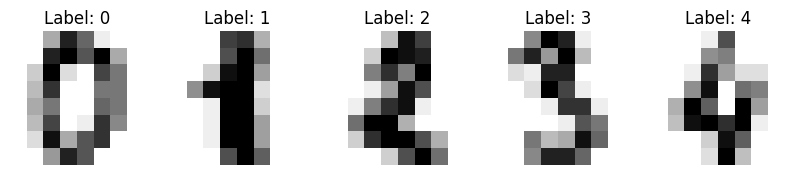

In [3]:
'''from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Explore the data
print(f"Data shape: {digits.data.shape}")  # Features
print(f"Target shape: {digits.target.shape}")  # Labels

# Visualize the first few digits
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
plt.show()'''


In [5]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [26]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

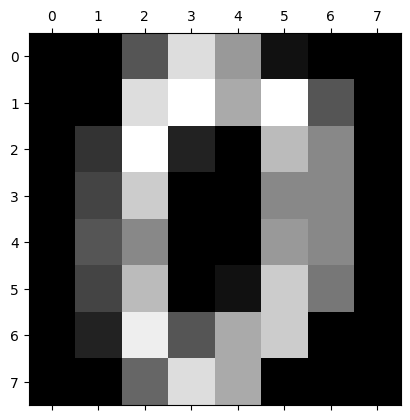

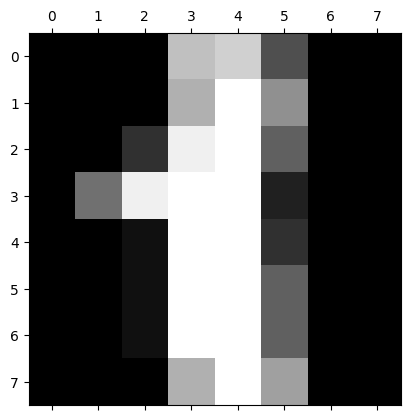

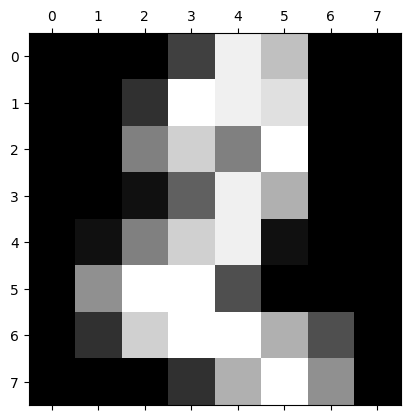

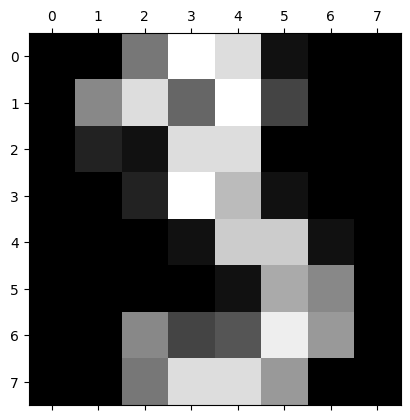

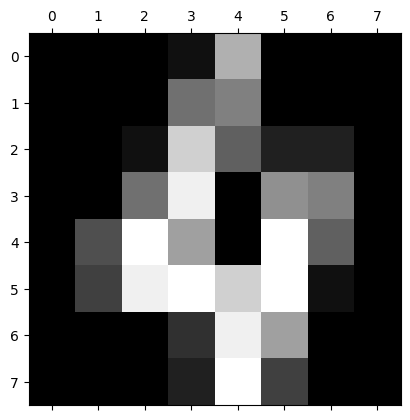

In [11]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])


In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size=0.2)

In [15]:
len(X_train)

1437

In [16]:
len(X_test)

360

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

F:\python_install\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(X_test,y_test)

0.9694444444444444

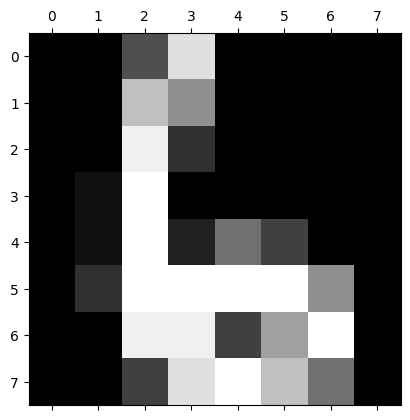

In [21]:
plt.matshow(digits.images[67])

In [22]:
digits.target[67]

np.int64(6)

In [23]:
model.predict([digits.data[67]])

array([6])

In [25]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# Confusion Matrix

In [27]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_predicted)
cm

array([[42,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 35,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 37,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]])

Text(176.7222222222224, 0.5, 'Truth')

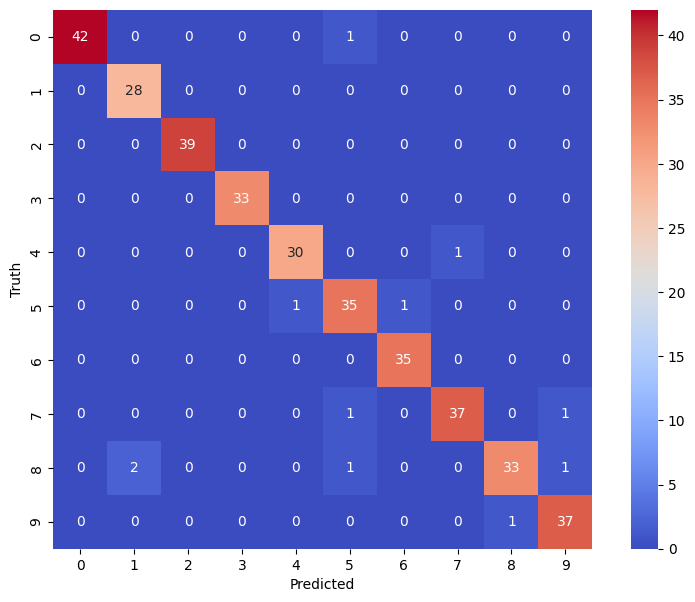

In [34]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='coolwarm',cbar=True,square=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')